In [59]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2

In [36]:
IMG_SIZE=256
Channel=3
train_datagen=ImageDataGenerator(
    rescale=1.0/225,
    horizontal_flip=True,
    rotation_range=30
    )
train_generator= train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1506 images belonging to 3 classes.


In [40]:
class_indices=train_generator.class_indices
class_name=list(class_indices.keys())
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [3]:
validation_datagen=ImageDataGenerator(
    rescale=1.0/225,
    horizontal_flip=True,
    rotation_range=30
)
validation_generator= validation_datagen.flow_from_directory(
    "dataset/val",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 215 images belonging to 3 classes.


In [4]:
test_datagen=ImageDataGenerator(
    rescale=1.0/225,
    horizontal_flip=True,
    rotation_range=30
)
test_generator= test_datagen.flow_from_directory(
    "dataset/test",
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 431 images belonging to 3 classes.


In [65]:
test_generator[0][0].shape

(32, 256, 256, 3)

In [5]:
Batch_size=32
input_shape=(IMG_SIZE,IMG_SIZE,Channel)
n_classes=3
model=models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [8]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

In [9]:
Epoch=10
history=model.fit(
    train_generator,
    steps_per_epoch=47,  # train_generator's X / batch Size and this will let yoy know how many step you should use for an epoch
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,   # validatin_generator's Y / batch Size and this will let you know how many step you should use for an epoch
    verbose=1,
    epochs=Epoch
)

Epoch 1/10
47/47 [==============================] - 132s 3s/step - loss: 0.9134 - accuracy: 0.5027 - val_loss: 0.8570 - val_accuracy: 0.5365
Epoch 2/10
47/47 [==============================] - 120s 3s/step - loss: 0.7507 - accuracy: 0.6832 - val_loss: 0.5677 - val_accuracy: 0.7865
Epoch 3/10
47/47 [==============================] - 115s 2s/step - loss: 0.4931 - accuracy: 0.7951 - val_loss: 0.3789 - val_accuracy: 0.8542
Epoch 4/10
47/47 [==============================] - 117s 2s/step - loss: 0.3488 - accuracy: 0.8623 - val_loss: 0.2875 - val_accuracy: 0.8802
Epoch 5/10
47/47 [==============================] - 138s 3s/step - loss: 0.3675 - accuracy: 0.8514 - val_loss: 0.3648 - val_accuracy: 0.8542
Epoch 6/10
47/47 [==============================] - 136s 3s/step - loss: 0.2995 - accuracy: 0.8752 - val_loss: 0.3374 - val_accuracy: 0.8698
Epoch 7/10
47/47 [==============================] - 153s 3s/step - loss: 0.1828 - accuracy: 0.9267 - val_loss: 0.1835 - val_accuracy: 0.9115
Epoch 8/10
47

In [10]:
scores=model.evaluate(test_generator)

14/14 [==============================] - 16s 1s/step - loss: 0.1232 - accuracy: 0.9536


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [79]:
image=train_generator[0][0]
prediction=model.predict(image)
class_name[np.argmax(prediction[1])]

1/1 [==============================] - 1s 643ms/step


'Potato___Late_blight'

In [50]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i])
    img_array=tf.expand_dims(img_array,0)  #Create a batch by adding outer batch dimension axis
    predictions=model.predict(img_array)
    predicted_class=class_name[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 54ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 58ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 56ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 54ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 66ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 56ms/step


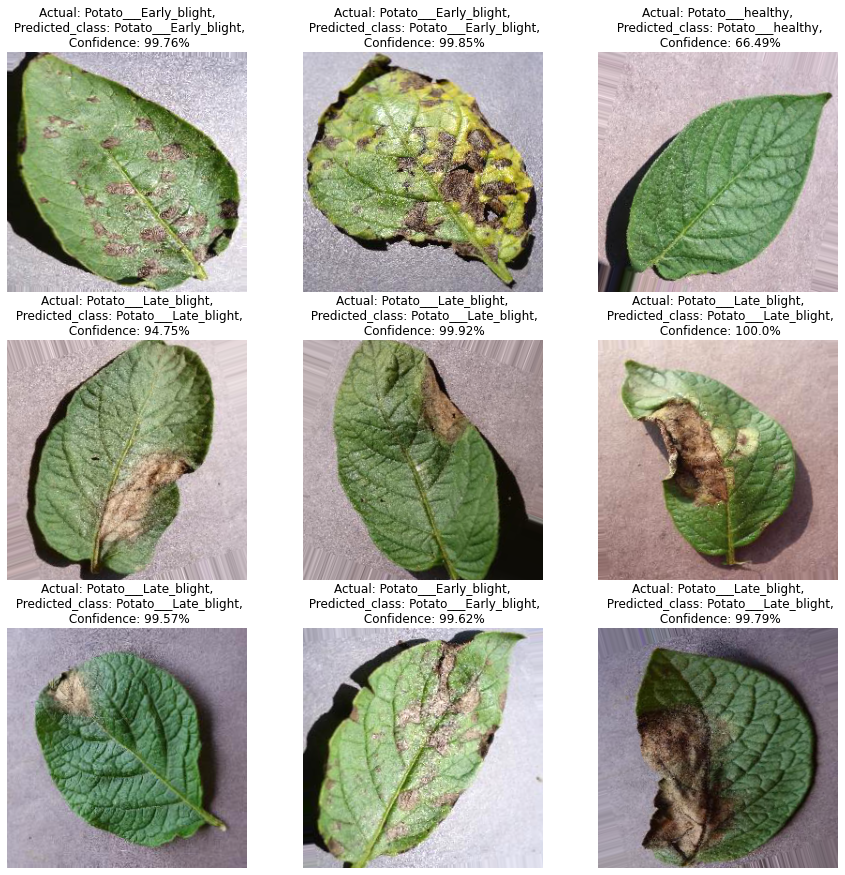

In [55]:
plt.figure(figsize=(15,15))
for image,label in test_generator:
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i])
        predicted_class,confidence=predict(model,image[i])
        actual_class=class_name[int(label[i])]
        plt.title(f"Actual: {actual_class},\n Predicted_class: {predicted_class},\n Confidence: {confidence}%")
        plt.axis('off')
    break

In [15]:
score = model.evaluate(test_generator)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

14/14 [==============================] - 13s 921ms/step - loss: 0.1502 - accuracy: 0.9466
Test Loss: 0.15018624067306519
Test Accuracy: 0.9466357231140137


In [80]:
model.save(r"C:\Users\Aung Zaw Htet\Desktop\AI\Potato Classification\Potato1.h5")